In [156]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

### params

In [166]:
mu = -0.2
t1 = 10 # czas pierwszej linii
cap1 = 100 # przepustowosc pierwszej
cap2 = 999999 # przepustowosc drugiej
q = 200 # potok

#### calc betas

In [187]:
betas = [1,1.3,1.6,1.8]
steps = [0.4,0.7,0.9,]
def get_beta(q,cap):
    ratio = q/float(cap)
    for i in range(3):
        if ratio<steps[i]:
            return betas[i]  
    return betas[-1]

### calc probs

In [188]:
def p(row):
    t2 = row.t
    q = row.q
    u1 = t1*get_beta(q,cap1)
    u2 = t2*betas[0]
    return (math.exp(mu*u1))/((math.exp(mu*u1)+math.exp(mu*u2)))

def p_array(t2,q):
    u1 = t1*get_beta(q,cap1)
    u2 = t2*betas[0]
    return (math.exp(mu*u1))/((math.exp(mu*u1)+math.exp(mu*u2)))

### obliczenia

In [195]:
n=100 # n steps
m=1 # multiplier (10 -> m*10)
t_range = [round(t0*(1+m*_/n),2) for _ in range(n+1)] # zakres czasow drugiej linii
q_range =  [int(m*q*(_/n)) for _ in range(n+1)] # zakres liczby pasazerow na pierwszej linii
df = pd.DataFrame([[t,int(q)] for t in t_range for q in q_range], columns = ['t','q'] )
df['p']=df.apply(p,axis=1)
df = df.pivot(index='t',columns='q',values='p')
df.index = df.index.astype('int')

In [196]:
df.head()

q,0,2,4,6,8,10,12,14,16,18,...,182,184,186,188,190,192,194,196,198,200
t,,,,,,,,,,,,,,,,,,,,,
10,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982,0.167982
10,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,...,0.170795,0.170795,0.170795,0.170795,0.170795,0.170795,0.170795,0.170795,0.170795,0.170795
10,0.509999,0.509999,0.509999,0.509999,0.509999,0.509999,0.509999,0.509999,0.509999,0.509999,...,0.173647,0.173647,0.173647,0.173647,0.173647,0.173647,0.173647,0.173647,0.173647,0.173647
10,0.514996,0.514996,0.514996,0.514996,0.514996,0.514996,0.514996,0.514996,0.514996,0.514996,...,0.176535,0.176535,0.176535,0.176535,0.176535,0.176535,0.176535,0.176535,0.176535,0.176535
10,0.519989,0.519989,0.519989,0.519989,0.519989,0.519989,0.519989,0.519989,0.519989,0.519989,...,0.179462,0.179462,0.179462,0.179462,0.179462,0.179462,0.179462,0.179462,0.179462,0.179462


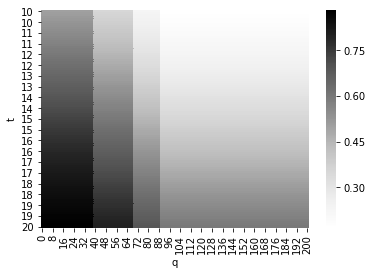

In [197]:
sns.heatmap(df, cmap = 'Greys')

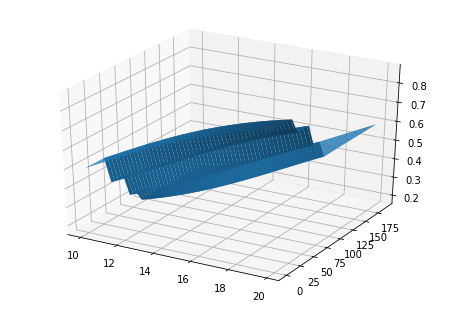

In [198]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

fig = plt.figure()
ax = Axes3D(fig)
t = np.arange(10, 20, 0.1)
q = np.arange(0, 200, 10)
X, Y = np.meshgrid(t, q)
zs = np.array([p_array(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)